people.iamges.shape: (1026, 87, 65)
클래스 개수 : 11
Atal Bihari Vajpayee       24    
Bill Clinton               29    Donald Rumsfeld           121    George W Bush             530    
Gerhard Schroeder         109    Gloria Macapagal Arroyo    44    Igor Ivanov                20    
Junichiro Koizumi          60    Lleyton Hewitt             41    Tiger Woods                23    
Tom Daschle                25    1 최근접 이웃의 테스트 세트 점수 : 0.53
X_train_pca.shape: (304, 100)
테스트 세트 정확도: 0.48


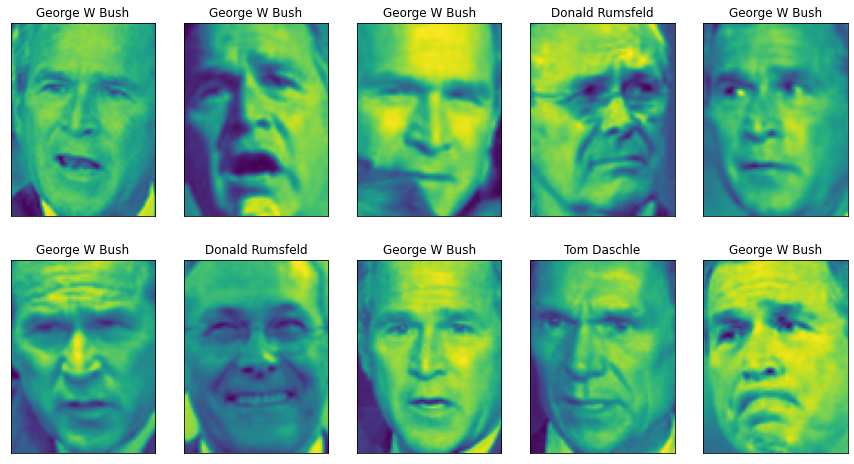

In [25]:
from sklearn.datasets import fetch_lfw_people
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

people = fetch_lfw_people(min_faces_per_person=20, resize=0.7)

image_shape = people.images[0].shape

fig, axes = plt.subplots(2,5,figsize=(15,8), subplot_kw={'xticks':(),'yticks':()})

for target, image, ax in zip(people.target, people.images, axes.ravel()):
    ax.imshow(image)
    ax.set_title(people.target_names[target])
print("people.iamges.shape: {}".format(people.images.shape))
print('클래스 개수 : {}'.format(len(people.target_names)))

counts = np.bincount(people.target)

for i, (count,name) in enumerate(zip(counts,people.target_names)):
    print('{0:25} {1:3}'.format(name,count), end='    ')
    if (i+3) % 3 == 0 :
        print()

np.where(people.target==target)
np.where(people.target==target)[0]
np.where(people.target==target)[0][:50]

mask = np.zeros(people.target.shape, dtype=np.bool)
for target in np.unique(people.target):
    # people.target == target 으로 np.array 에 담긴 데이터 접근
    # [0] 인수로 np.array 접근 
    # [:50] 로 target 과 일치하는 index들을 추출
    # 추출된 index 에만 1을 대입 
    mask[np.where(people.target==target)[0][:50]] = 1 

X_people = people.data[mask]
y_people = people.target[mask]

X_people = X_people/ 255.


from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
X_train, X_test, y_train, y_test = train_test_split(X_people, y_people, stratify=y_people, random_state=0)

knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train,y_train)
print("1 최근접 이웃의 테스트 세트 점수 : {:.2f}".format(knn.score(X_test,y_test)))

from sklearn.decomposition import PCA
pca = PCA(n_components=100, whiten=True, random_state=0).fit(X_train)
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

print("X_train_pca.shape: {}".format(X_train_pca.shape))

nn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train_pca,y_train)
print("테스트 세트 정확도: {:.2f}".format(knn.score(X_test_pca, y_test)))
